In [1]:
!wget https://raw.githubusercontent.com/ChiThang-50Cent/review-classification-BERT/main/Data/eval.csv
!wget https://raw.githubusercontent.com/ChiThang-50Cent/review-classification-BERT/main/Data/train.csv

--2023-12-03 19:49:51--  https://raw.githubusercontent.com/ChiThang-50Cent/review-classification-BERT/main/Data/eval.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18413 (18K) [text/plain]
Saving to: ‘eval.csv.1’

eval.csv.1          100%[===================>]  17.98K  --.-KB/s    in 0s      

2023-12-03 19:49:51 (98.1 MB/s) - ‘eval.csv.1’ saved [18413/18413]

--2023-12-03 19:49:51--  https://raw.githubusercontent.com/ChiThang-50Cent/review-classification-BERT/main/Data/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

In [3]:
df_train = pd.read_csv('/content/train.csv')
df_test = pd.read_csv('/content/eval.csv')

In [4]:
def bar_plot_class(train=df_train, test=df_test, target='label', sharey=False):
  train_count = train[target].value_counts()
  test_count = test[target].value_counts()

  fig, ax = plt.subplots(1, 2, figsize = (10, 5), sharey=sharey)

  sns.barplot(x=train_count.index, y=train_count.values, ax=ax[0])
  ax[0].set_title('Train set')
  ax[0].set_xlabel('Class')
  ax[0].set_ylabel('Count')

  sns.barplot(x=test_count.index, y=test_count.values, ax=ax[1])
  ax[1].set_title('Test set')
  ax[1].set_xlabel('Class')
  ax[1].set_ylabel('Count')

  plt.show()

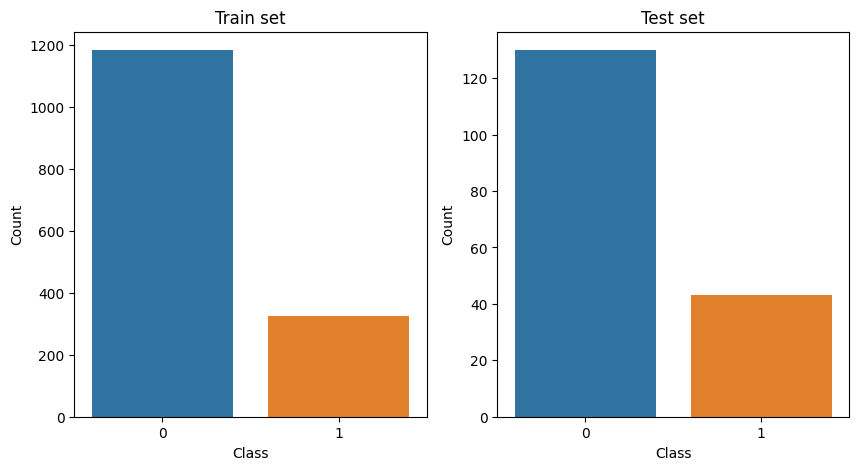

In [5]:
bar_plot_class()

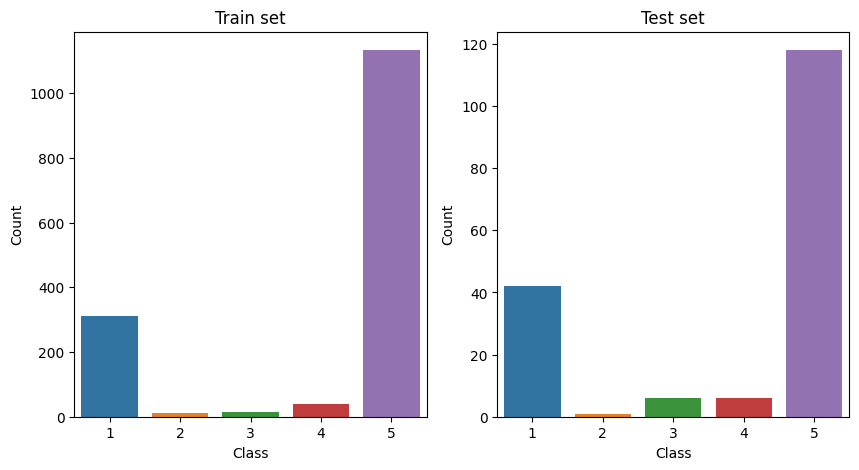

In [6]:
bar_plot_class(target='rate_star')

In [9]:
def hist_plot(train=df_train, test=df_test, target='comment', sharey=False):
  train, test = train.copy(), test.copy()

  train['len'] = train[target].apply(lambda x: len(x.split(' ')))
  test['len'] = test[target].apply(lambda x: len(x.split(' ')))

  fig, ax = plt.subplots(1, 2, figsize = (10, 5), sharey=sharey)

  sns.histplot(data=train, x='len', kde=True, ax=ax[0])
  ax[0].set_title('Train set')
  ax[0].set_xlabel('Value')
  ax[0].set_ylabel('Count')

  sns.histplot(data=test, x='len', kde=True, ax=ax[1])
  ax[1].set_title('Test set')
  ax[1].set_xlabel('Value')
  ax[1].set_ylabel('Count')

  plt.show()

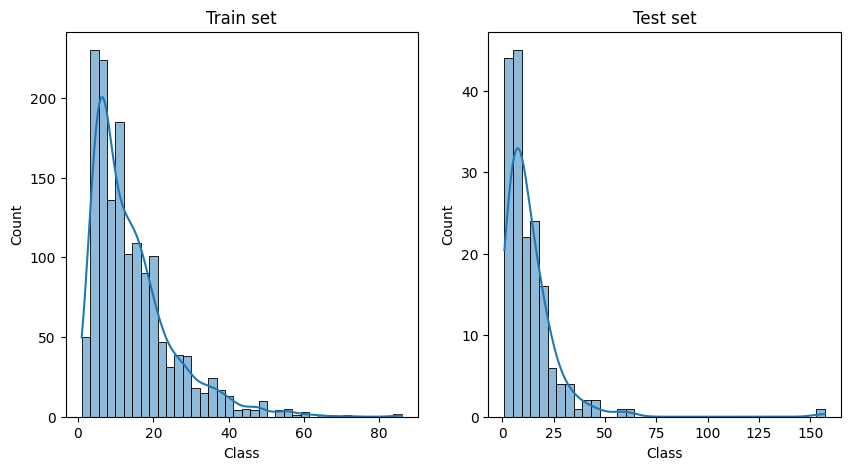

In [10]:
hist_plot()

In [59]:
def word_cloud(train=df_train, test=df_test, class_=0):
  train_text = ""
  test_text = ""

  for i in range(len(train['comment'])):
    if train.iloc[i]['label'] == class_:
      train_text += train.iloc[i]['comment'].lower() + ' '

  for i in range(len(test['comment'])):
    if test.iloc[i]['label'] == class_:
      test_text += test.iloc[i]['comment'].lower() + ' '

  train_wordcloud = WordCloud(width=500, height=500, background_color='white', collocations=False).generate(train_text)
  test_wordcloud = WordCloud(width=500, height=500, background_color='white', collocations=False).generate(test_text)

  fig, ax = plt.subplots(1, 2, figsize=(15, 10))

  ax[0].imshow(train_wordcloud)
  ax[1].imshow(test_wordcloud)

  plt.show()

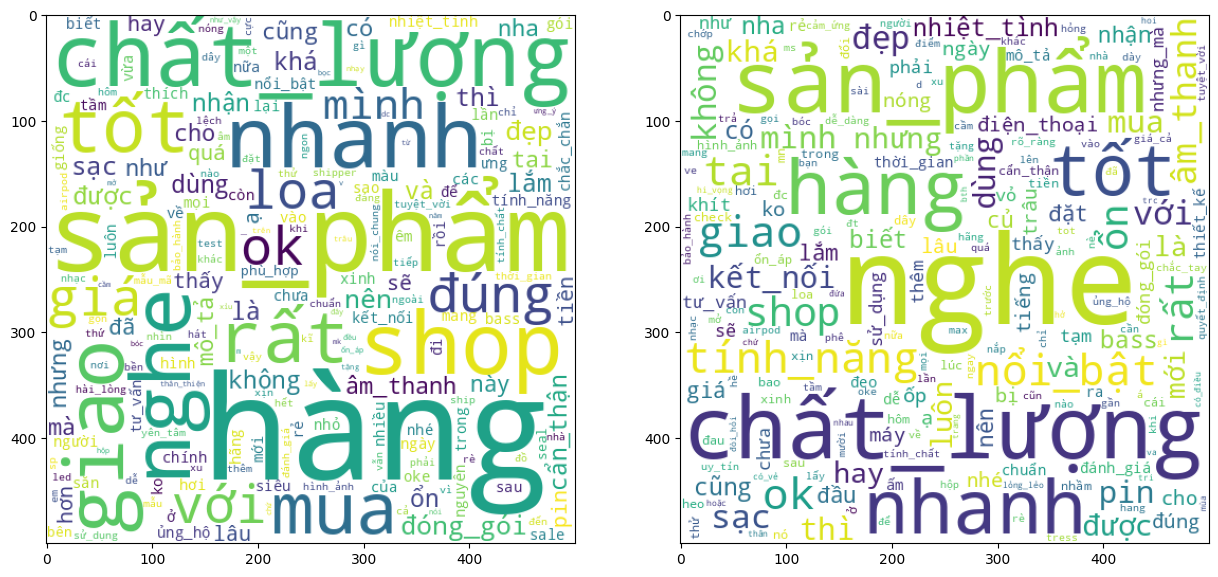

In [60]:
word_cloud()

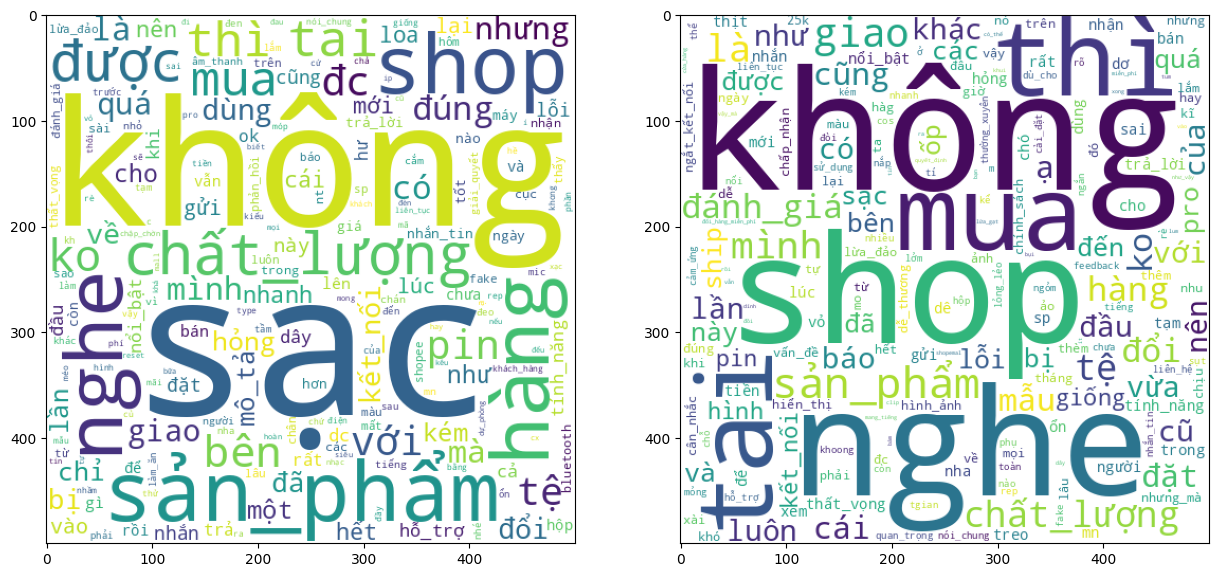

In [61]:
word_cloud(class_=1)